### The solution of Case Study 1 in Course 8 - Google DA Coursera

## Import dependencies

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Import data

In [113]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
import json
f = open("kaggle.json")
key = json.load(f)

In [115]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andysantiago/cyclistics-data-april-2020-march-2021")

Skipping, found downloaded files in "./cyclistics-data-april-2020-march-2021" (use force=True to force download)


In [116]:
import os
files = []
for dirname, _, filenames in os.walk('/content/cyclistics-data-april-2020-march-2021'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
        
files

['/content/cyclistics-data-april-2020-march-2021/202102-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202007-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202005-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202011-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202101-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202103-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202008-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202004-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202104-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202006-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202010-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202009-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202012-divvy-tripdata.csv']

In [117]:
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member


In [118]:
# Number of rows, columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 3826978
Number of columns: 13


In [119]:
# Number of duplicated rows
print(f'Number of duplicated rows: {sum(df.duplicated())}')

Number of duplicated rows: 0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3826978 entries, 0 to 3826977
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 379.6+ MB


In [121]:
# Number of null rows in each columns
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    148231
start_station_id      148857
end_station_name      171416
end_station_id        171877
start_lat                  0
start_lng                  0
end_lat                 5005
end_lng                 5005
member_casual              0
dtype: int64

## Preprocessing

In [122]:
# Remove null rows
df.dropna(inplace = True)
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [123]:
# Remove start_lat, end_lat, start_lng, end_lng as this data was dropped beginning in 2020 (as explaining in script)
df.drop(columns = ['start_lat','start_lng','end_lat','end_lng'], inplace = True)

In [124]:
# Convert ended_at and started_at to datetime
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])

In [125]:
# Calculate the range of each ride
df['ride_length'] = df['ended_at'] - df['started_at']
df['ride_length']

0         0 days 00:06:47
1         0 days 00:19:31
2         0 days 00:08:52
3         0 days 00:04:25
4         0 days 00:15:14
                ...      
3826973   0 days 00:03:48
3826974   0 days 00:03:33
3826975   0 days 00:08:30
3826976   0 days 00:03:01
3826977   0 days 00:03:32
Name: ride_length, Length: 3592898, dtype: timedelta64[ns]

In [126]:
# There are some rides where tripduration shows up as negative, including several hundred rides where 
# Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides
df['days'] = df['ride_length'].apply(lambda x: x.days)
df = df[df['days']>=0]

In [127]:
def time_to_minutes(td):
#     hours = td.days*24 +  td.seconds // 3600
#     minutes = (td.seconds%3600)//60
#     seconds = (td.seconds%3600)%60
    return round(td.days*60*24 + td.seconds/60,3)

In [128]:
# Seconds does not take number of days
# Convert ride_length to minutes
df['ride_length'] = df['ride_length'].apply(lambda x: time_to_minutes(x))

In [129]:
# Drop rows which ride_length equals 0
df = df[df['ride_length'] > 1]

In [130]:
# Monday: 0, Sunday: 6
df['day_of_week'] = df['started_at'].apply(lambda x: x.weekday()) 

In [131]:
# Add day, month, year columns of started_at
df['day'] = df['started_at'].apply(lambda x: x.day)
df['month'] = df['started_at'].apply(lambda x: x.month)
df['year'] = df['started_at'].apply(lambda x: x.year)

In [161]:
df['date'] = df['started_at'].apply(lambda x: x.date())
df['date'] = pd.to_datetime(df['date'])

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3535506 entries, 0 to 3826977
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
 9   ride_length         float64       
 10  days                int64         
 11  day_of_week         int64         
 12  day                 int64         
 13  month               int64         
 14  year                int64         
 15  date                datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(5), object(7)
memory usage: 458.6+ MB


In [164]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,days,day_of_week,day,month,year,date
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,member,6.783,0,4,12,2,2021,2021-02-12
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,casual,19.517,0,6,14,2,2021,2021-02-14
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,member,8.867,0,1,9,2,2021,2021-02-09
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,member,4.417,0,1,2,2,2021,2021-02-02
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,member,15.233,0,1,23,2,2021,2021-02-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826973,4631EE956BCEA738,classic_bike,2020-12-19 13:59:33,2020-12-19 14:03:21,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,casual,3.800,0,5,19,12,2020,2020-12-19
3826974,D17CBEDEA8DBDFF6,electric_bike,2020-12-20 15:48:41,2020-12-20 15:52:14,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,member,3.550,0,6,20,12,2020,2020-12-20
3826975,447A6C67E9AF962E,docked_bike,2020-12-02 16:59:58,2020-12-02 17:08:28,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,member,8.500,0,2,2,12,2020,2020-12-02
3826976,F558C17E95751C62,electric_bike,2020-12-20 18:06:52,2020-12-20 18:09:53,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,member,3.017,0,6,20,12,2020,2020-12-20


## EDA


In [166]:
casual_df = df[df['member_casual'] == "casual"]
casual_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,days,day_of_week,day,month,year,date
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,casual,19.517,0,6,14,2,2021,2021-02-14
5,BDAA7E3494E8D545,electric_bike,2021-02-24 15:43:33,2021-02-24 15:49:05,Fairbanks St & Superior St,18003,LaSalle Dr & Huron St,KP1705001026,casual,5.533,0,2,24,2,2021,2021-02-24
21,2C4AF52044E874FC,electric_bike,2021-02-26 18:16:25,2021-02-26 18:27:55,Wells St & Huron St,TA1306000012,State St & Harrison St,SL-007,casual,11.500,0,4,26,2,2021,2021-02-26
25,42B25557198348CC,classic_bike,2021-02-23 16:05:02,2021-02-23 16:20:35,Damen Ave & Cortland St,13133,Damen Ave & Cortland St,13133,casual,15.550,0,1,23,2,2021,2021-02-23
28,78849DFCC4D4B7A0,classic_bike,2021-02-28 13:31:50,2021-02-28 14:47:14,Southport Ave & Waveland Ave,13235,Southport Ave & Waveland Ave,13235,casual,75.400,0,6,28,2,2021,2021-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826966,99741BBCF3E82A6B,classic_bike,2020-12-27 12:14:30,2020-12-27 12:18:16,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,casual,3.767,0,6,27,12,2020,2020-12-27
3826967,2AE24B8F461EE351,electric_bike,2020-12-16 17:42:08,2020-12-16 18:04:47,Bissell St & Armitage Ave,13059,California Ave & Altgeld St,15646,casual,22.650,0,2,16,12,2020,2020-12-16
3826968,C354FD80C4EE7E05,classic_bike,2020-12-19 18:53:27,2020-12-19 19:16:10,Sheffield Ave & Webster Ave,TA1309000033,California Ave & Altgeld St,15646,casual,22.717,0,5,19,12,2020,2020-12-19
3826969,BF6E2B5E79BB83BD,electric_bike,2020-12-18 19:13:12,2020-12-18 19:33:15,Sheffield Ave & Webster Ave,TA1309000033,California Ave & Altgeld St,15646,casual,20.050,0,4,18,12,2020,2020-12-18


In [167]:
member_df = df[df['member_casual'] == "member"]
member_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,days,day_of_week,day,month,year,date
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,member,6.783,0,4,12,2,2021,2021-02-12
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,member,8.867,0,1,9,2,2021,2021-02-09
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,member,4.417,0,1,2,2,2021,2021-02-02
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,member,15.233,0,1,23,2,2021,2021-02-23
7,295476889D9B79F8,classic_bike,2021-02-11 18:33:53,2021-02-11 18:35:09,Fairbanks St & Superior St,18003,Fairbanks St & Superior St,18003,member,1.267,0,3,11,2,2021,2021-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826972,6248FC5575ADD257,classic_bike,2020-12-28 22:30:39,2020-12-28 22:36:34,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,member,5.917,0,0,28,12,2020,2020-12-28
3826974,D17CBEDEA8DBDFF6,electric_bike,2020-12-20 15:48:41,2020-12-20 15:52:14,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,member,3.550,0,6,20,12,2020,2020-12-20
3826975,447A6C67E9AF962E,docked_bike,2020-12-02 16:59:58,2020-12-02 17:08:28,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,member,8.500,0,2,2,12,2020,2020-12-02
3826976,F558C17E95751C62,electric_bike,2020-12-20 18:06:52,2020-12-20 18:09:53,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,member,3.017,0,6,20,12,2020,2020-12-20


## EDA casual_df and member_df
EDA casual_df and member_df parallel to show the differences between 2 types of customers

(array([2082140.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1453366.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

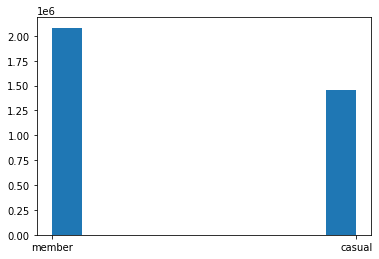

In [136]:
plt.hist(df['member_casual'])

## Day_of_week

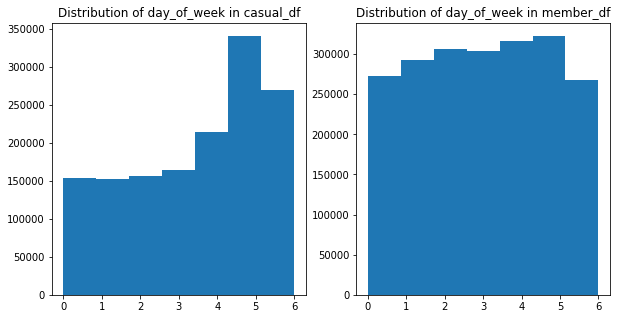

In [137]:
figure, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.hist(casual_df['day_of_week'],bins=7)
ax2.hist(member_df['day_of_week'],bins=7)

ax1.set_title("Distribution of day_of_week in casual_df")
ax2.set_title("Distribution of day_of_week in member_df")

plt.show()

* Casual customers are pretty high, it may because these customers ride for play outside

* But in work days, the amount of customers is stable (we can concentrate on these customers)

* With annual member, they ride almost all week, it may because they purchase annual membership to ride for work

### Rideable_type

In [138]:
casual_df['rideable_type'].value_counts()

docked_bike      1126741
electric_bike     187016
classic_bike      139609
Name: rideable_type, dtype: int64

In [139]:
member_df['rideable_type'].value_counts()

docked_bike      1409657
classic_bike      386580
electric_bike     285903
Name: rideable_type, dtype: int64

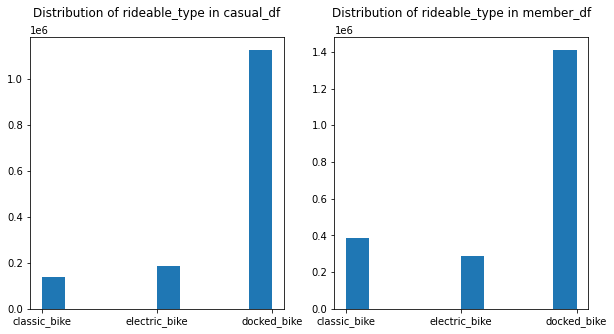

In [140]:
figure, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.hist(casual_df['rideable_type'])
ax2.hist(member_df['rideable_type'])

ax1.set_title("Distribution of rideable_type in casual_df", pad = 20.)
ax2.set_title("Distribution of rideable_type in member_df", pad = 20.)

plt.show()

## Analysis on ride_length

[Text(0.5, 1.0, 'Distribution of ride_length in member_df')]

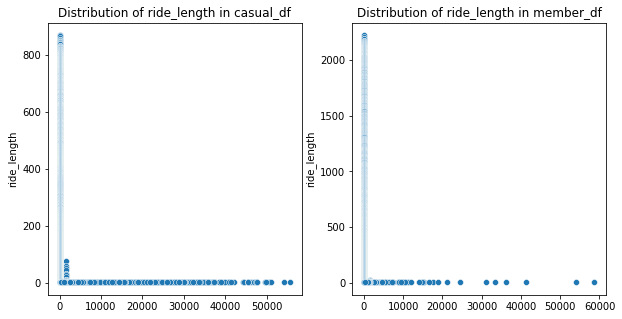

In [141]:
figure, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(data=casual_df['ride_length'].value_counts(),ax=ax1).set(title = "Distribution of ride_length in casual_df")
sns.scatterplot(data=member_df['ride_length'].value_counts(),ax=ax2).set(title = "Distribution of ride_length in member_df")

In [142]:
casual_df['ride_length'].describe()

count    1.453366e+06
mean     4.533895e+01
std      3.864232e+02
min      1.017000e+00
25%      1.195000e+01
50%      2.166700e+01
75%      4.093300e+01
max      5.568388e+04
Name: ride_length, dtype: float64

In [203]:
member_df['ride_length'].describe()

count    2.082140e+06
mean     1.602863e+01
std      9.036375e+01
min      1.017000e+00
25%      6.750000e+00
50%      1.166700e+01
75%      2.018300e+01
max      5.872003e+04
Name: ride_length, dtype: float64

## Time series of casual and member (from April 2020 to March 2021)

In [188]:
timeseries_casual = casual_df['date'].value_counts().sort_index()

2020-04-01     395
2020-04-02     546
2020-04-03     953
2020-04-04     528
2020-04-05     900
              ... 
2021-04-26    5019
2021-04-27    6939
2021-04-28    1373
2021-04-29    2577
2021-04-30    3953
Name: date, Length: 393, dtype: int64

In [189]:
timeseries_member = member_df['date'].value_counts().sort_index()

2020-04-01    1863
2020-04-02    2022
2020-04-03    2535
2020-04-04    1722
2020-04-05    1949
              ... 
2021-04-26    7549
2021-04-27    9055
2021-04-28    4342
2021-04-29    5774
2021-04-30    6499
Name: date, Length: 393, dtype: int64

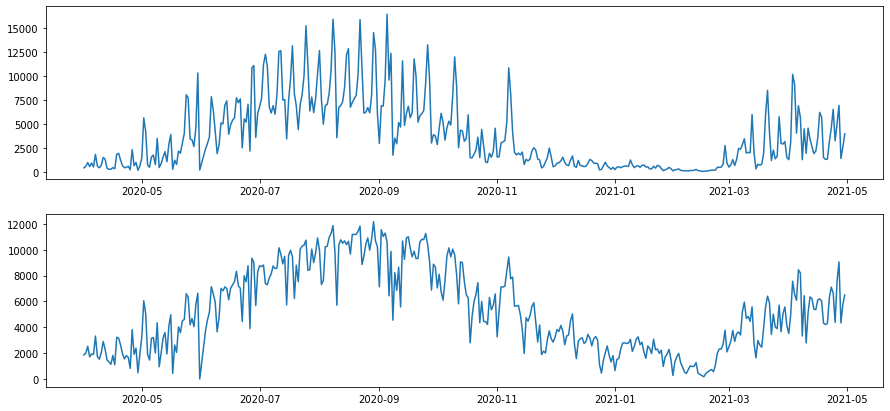

<Figure size 1600x500 with 0 Axes>

In [202]:
# Draw Plot
figure, (ax1,ax2) = plt.subplots(2,1, figsize=(15,7))
plt.figure(figsize=(16,5), dpi=100)

xlabel = "Date"
ylabel = "Counts"

ax1.plot(timeseries_casual.index, timeseries_casual[:])
ax2.plot(timeseries_member.index, timeseries_member[:])

plt.show()

ax1.set_title("Time series of casual customers")
ax2.set_title("Time series of member customers")

ax1.xlabel = xlabel
ax1.xlabel = xlabel

ax1.ylabel = ylabel
ax1.ylabel = ylabel